In [7]:
! pip install networkx osmnx matplotlib scipy

  Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl (23.1 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import osmnx as ox

In [3]:
city = "Trier, Germany"

G =  ox.graph_from_place(city, network_type='drive', custom_filter='["highway"~"primary|secondary|residential|motorway"]')


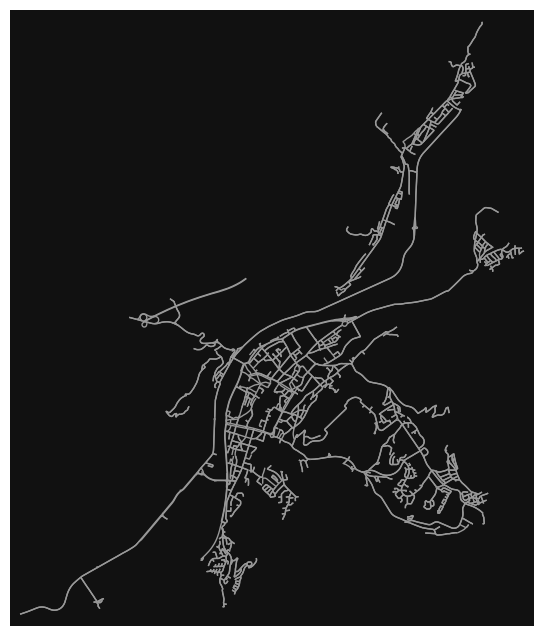

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
# Plot the graph without nodes, only edges
ox.plot_graph(G, node_size=0, node_alpha=0, node_color='none')

In [5]:
# Get node coordinates
nodes, edges = ox.graph_to_gdfs(G)
nodes = nodes[['y', 'x']]  # Only keep coordinates for simplicity
print(nodes.head())
print(nodes.shape)

                  y         x
osmid                        
10602396  49.750094  6.637228
10602410  49.749518  6.640148
10602412  49.753861  6.642500
10602431  49.754348  6.644230
10602432  49.753833  6.645809
(1466, 2)


In [8]:
import networkx as nx
# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(G)

# Convert to a dense matrix if needed
dense_matrix = adj_matrix.todense()

print(dense_matrix)
print(dense_matrix.shape)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1466, 1466)
